# FUTURE ENGINEERING

*Student Performance*

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

student = pd.read_csv("data/StudentsPerformance.csv")
student = student.rename(columns= {"math score":"math_score",
                                  "reading score":"reading_score",
                                  "writing score" : "writing_score"}) 
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
student.isna().sum()*100/student.shape[0]

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math_score                     0.0
reading_score                  0.0
writing_score                  0.0
dtype: float64

**1- Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?**

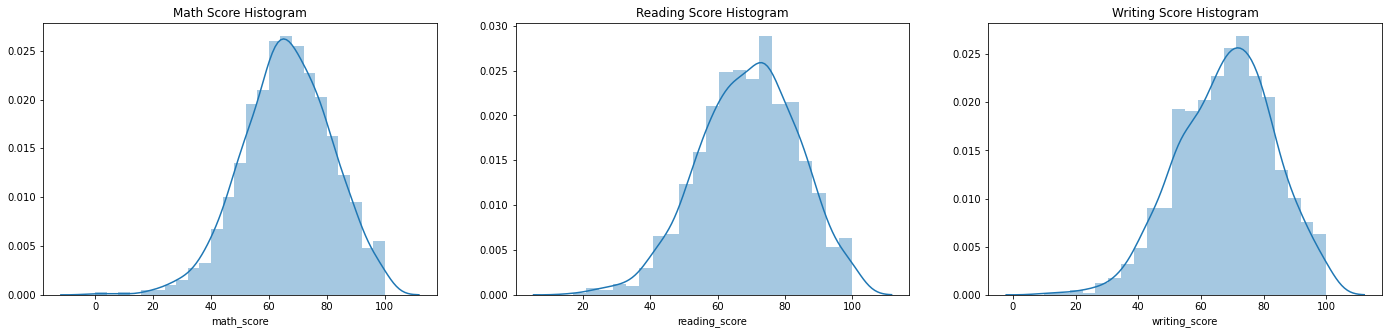

In [4]:
plt.figure(figsize=(24,5))
plt.subplot(131)
plt.title("Math Score Histogram")
sns.distplot(student.iloc[:,5])
plt.subplot(132)
plt.title("Reading Score Histogram")
sns.distplot(student.iloc[:,6])
plt.subplot(133)
plt.title("Writing Score Histogram")
sns.distplot(student.iloc[:,7])

In [5]:
np.log(student["math_score"])

0      4.276666
1      4.234107
2      4.499810
3      3.850148
4      4.330733
         ...   
995    4.477337
996    4.127134
997    4.077537
998    4.219508
999    4.343805
Name: math_score, Length: 1000, dtype: float64

In [6]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

variables = ["math_score","reading_score","writing_score"]
distribution_tests = pd.DataFrame(columns=['variable','jarque_bera_stats','jarque_bera_p_value','normal_stats','normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(student[variable])
    norm_stats = normaltest(student[variable])
    distribution_tests = distribution_tests.append({"variable":variable,
                                                   "jarque_bera_stats":jb_stats[0],
                                                   "jarque_bera_p_value": jb_stats[1],
                                                   "normal_stats":norm_stats[0],
                                                   "normal_p_value": norm_stats[1]},ignore_index = True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math_score,15.91226,0.00035,15.40896,0.00045
1,reading_score,11.38330,0.00337,11.11741,0.00385
2,writing_score,13.98509,0.00092,13.60645,0.00111


**H0 : Data has normal distribution.
H1 : Data does not have normal distribution.**

*All of them is negatively skewed.*

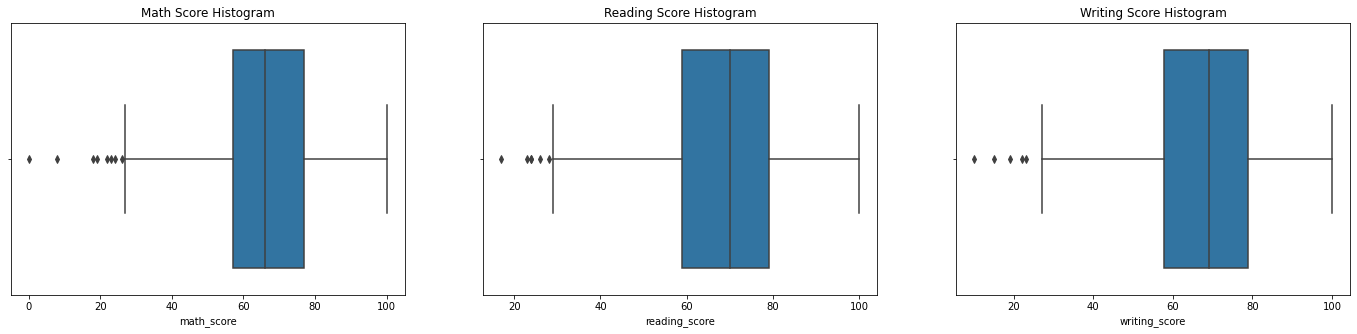

In [7]:
plt.figure(figsize=(24,5))
plt.subplot(131)
plt.title("Math Score Histogram")
sns.boxplot(student.iloc[:,5])
plt.subplot(132)
plt.title("Reading Score Histogram")
sns.boxplot(student.iloc[:,6])
plt.subplot(133)
plt.title("Writing Score Histogram")
sns.boxplot(student.iloc[:,7])



In [8]:
from scipy.stats.mstats import winsorize
wins_math_score = winsorize(np.array(student.iloc[:,5]),(0.017,0))
student["wins_math_score"] = wins_math_score

wins_reading_score = winsorize(np.array(student.iloc[:,6]),(0.017,0))
student["wins_reading_score"] = wins_reading_score

wins_writing_score = winsorize(np.array(student.iloc[:,6]),(0.017,0))
student["wins_writing_score"] = wins_writing_score

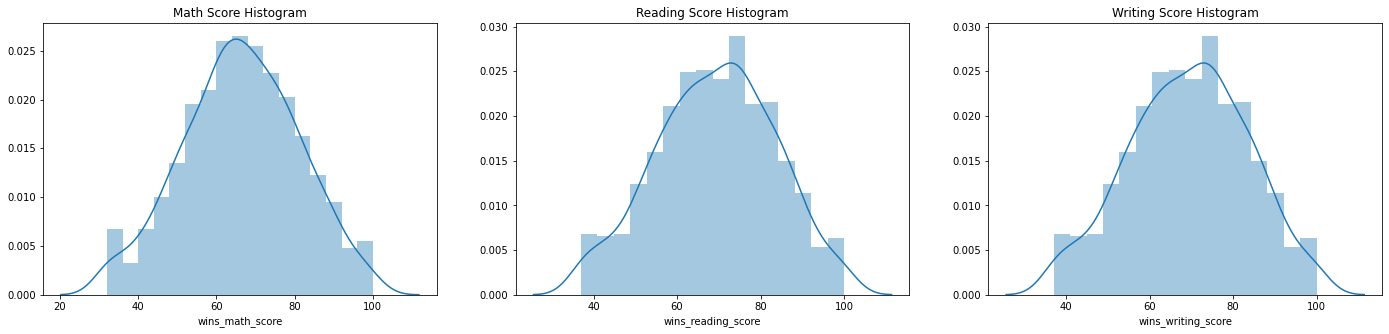

In [9]:
plt.figure(figsize=(24,5))
plt.subplot(131)
plt.title("Math Score Histogram")
sns.distplot(student.wins_math_score)
plt.subplot(132)
plt.title("Reading Score Histogram")
sns.distplot(student.wins_reading_score)
plt.subplot(133)
plt.title("Writing Score Histogram")
sns.distplot(student.wins_writing_score)

*I winsorized scores for get a normal distribution*

In [10]:
variables = ["wins_math_score","wins_reading_score","wins_writing_score"]
distribution_tests = pd.DataFrame(columns=['variable','jarque_bera_stats','jarque_bera_p_value','normal_stats','normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(np.log(student[variable]))
    norm_stats = normaltest(np.log(student[variable]))
    distribution_tests = distribution_tests.append({"variable":variable,
                                                   "jarque_bera_stats":jb_stats[0],
                                                   "jarque_bera_p_value": jb_stats[1],
                                                   "normal_stats":norm_stats[0],
                                                   "normal_p_value": norm_stats[1]},ignore_index = True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,wins_math_score,90.22034,0.00000,74.93083,0.00000
1,wins_reading_score,68.21833,0.00000,58.82350,0.00000
2,wins_writing_score,68.21833,0.00000,58.82350,0.00000


In [11]:
from sklearn.preprocessing import normalize

student["norm_wins_math_score"] = normalize(np.array(student["wins_math_score"]).reshape(1,-1)).reshape(-1,1)
student["norm_wins_reading_score"] = normalize(np.array(student["wins_reading_score"]).reshape(1,-1)).reshape(-1,1)
student["norm_wins_writing_score"] = normalize(np.array(student["wins_writing_score"]).reshape(1,-1)).reshape(-1,1)

normal_features = ["wins_math_score","norm_wins_math_score","wins_reading_score","norm_wins_reading_score","wins_writing_score","norm_wins_writing_score"]

print('Minimum Value\n-----------------',)
print(student[normal_features].min())
print('\nMaximum Value\n-----------------',)
print(student[normal_features].max())

Minimum Value
-----------------
wins_math_score           32.00000
norm_wins_math_score       0.01491
wins_reading_score        37.00000
norm_wins_reading_score    0.01654
wins_writing_score        37.00000
norm_wins_writing_score    0.01654
dtype: float64

Maximum Value
-----------------
wins_math_score           100.00000
norm_wins_math_score        0.04660
wins_reading_score        100.00000
norm_wins_reading_score     0.04470
wins_writing_score        100.00000
norm_wins_writing_score     0.04470
dtype: float64


In [12]:
variables = ["norm_wins_math_score","norm_wins_reading_score","norm_wins_writing_score"]
distribution_tests = pd.DataFrame(columns=['variable','jarque_bera_stats','jarque_bera_p_value','normal_stats','normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(np.log(student[variable]))
    norm_stats = normaltest(np.log(student[variable]))
    distribution_tests = distribution_tests.append({"variable":variable,
                                                   "jarque_bera_stats":jb_stats[0],
                                                   "jarque_bera_p_value": jb_stats[1],
                                                   "normal_stats":norm_stats[0],
                                                   "normal_p_value": norm_stats[1]},ignore_index = True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,norm_wins_math_score,90.22034,0.00000,74.93083,0.00000
1,norm_wins_reading_score,68.21833,0.00000,58.82350,0.00000
2,norm_wins_writing_score,68.21833,0.00000,58.82350,0.00000


**2- We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.**

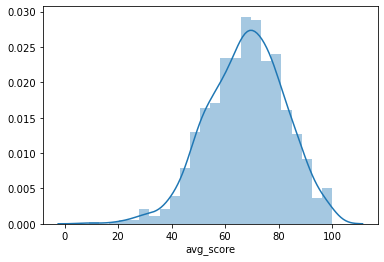

In [13]:
lst = []
for x in range(student.shape[0]):
    lst.append((student.iloc[:,5].iloc[x] + student.iloc[:,6].iloc[x] + student.iloc[:,7].iloc[x])/3)
student["avg_score"] = lst

sns.distplot(student.avg_score)

In [14]:
variables = ["avg_score"]
distribution_tests = pd.DataFrame(columns=['variable','jarque_bera_stats','jarque_bera_p_value','normal_stats','normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(np.log(student[variable]))
    norm_stats = normaltest(np.log(student[variable]))
    distribution_tests = distribution_tests.append({"variable":variable,
                                                   "jarque_bera_stats":jb_stats[0],
                                                   "jarque_bera_p_value": jb_stats[1],
                                                   "normal_stats":norm_stats[0],
                                                   "normal_p_value": norm_stats[1]},ignore_index = True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,avg_score,2167.03935,0.00000,361.83694,0.00000


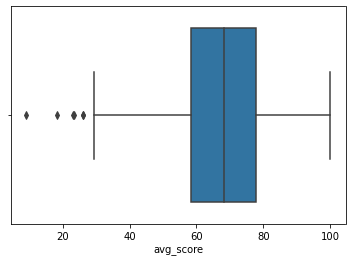

In [15]:
sns.boxplot(student.avg_score)

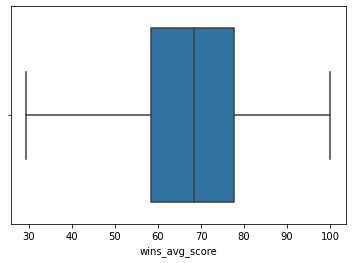

In [16]:
wins_avg_score = winsorize(np.array(student.avg_score),(0.006,0))
student["wins_avg_score"] = wins_avg_score
sns.boxplot(student.wins_avg_score)

In [17]:
variables = ["wins_avg_score"]
distribution_tests = pd.DataFrame(columns=['variable','jarque_bera_stats','jarque_bera_p_value','normal_stats','normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(student[variable])
    norm_stats = normaltest(student[variable])
    distribution_tests = distribution_tests.append({"variable":variable,
                                                   "jarque_bera_stats":jb_stats[0],
                                                   "jarque_bera_p_value": jb_stats[1],
                                                   "normal_stats":norm_stats[0],
                                                   "normal_p_value": norm_stats[1]},ignore_index = True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,wins_avg_score,9.22422,0.00993,9.35183,0.00932


In [18]:
student["norm_wins_avg_score"] = normalize(np.array(student["wins_avg_score"]).reshape(1,-1)).reshape(-1,1)
variables = ["norm_wins_avg_score"]
distribution_tests = pd.DataFrame(columns=['variable','jarque_bera_stats','jarque_bera_p_value','normal_stats','normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(student[variable])
    norm_stats = normaltest(student[variable])
    distribution_tests = distribution_tests.append({"variable":variable,
                                                   "jarque_bera_stats":jb_stats[0],
                                                   "jarque_bera_p_value": jb_stats[1],
                                                   "normal_stats":norm_stats[0],
                                                   "normal_p_value": norm_stats[1]},ignore_index = True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,norm_wins_avg_score,9.22422,0.00993,9.35183,0.00932


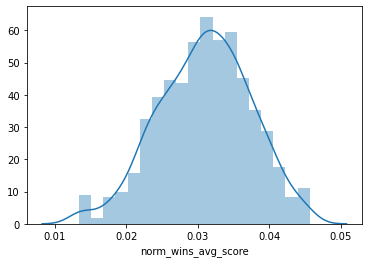

In [19]:
sns.distplot(student.norm_wins_avg_score)
plt.show()

**3- Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?**

In [20]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,wins_math_score,wins_reading_score,wins_writing_score,norm_wins_math_score,norm_wins_reading_score,norm_wins_writing_score,avg_score,wins_avg_score,norm_wins_avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72,72,72,0.03355,0.03218,0.03218,72.66667,72.66667,0.03317
1,female,group C,some college,standard,completed,69,90,88,69,90,90,0.03216,0.04023,0.04023,82.33333,82.33333,0.03759
2,female,group B,master's degree,standard,none,90,95,93,90,95,95,0.04194,0.04246,0.04246,92.66667,92.66667,0.04230
3,male,group A,associate's degree,free/reduced,none,47,57,44,47,57,57,0.02190,0.02548,0.02548,49.33333,49.33333,0.02252
4,male,group C,some college,standard,none,76,78,75,76,78,78,0.03542,0.03486,0.03486,76.33333,76.33333,0.03485


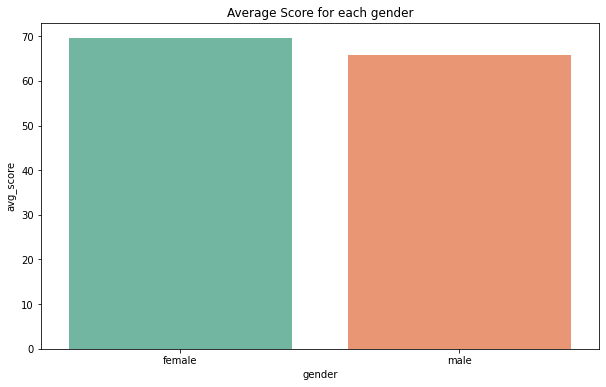

In [21]:
gender_vs = student.groupby(student.gender).avg_score.mean().reset_index()
gender_vs = gender_vs.set_index('gender')
plt.figure(figsize = (10,6))
sns.barplot(x = gender_vs.index, y = gender_vs.avg_score, palette="Set2")
plt.title("Average Score for each gender")
plt.show()

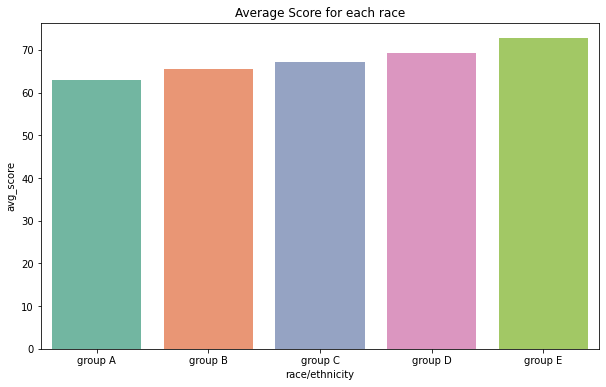

In [22]:
race_vs = student.groupby(student["race/ethnicity"]).avg_score.mean().reset_index()
race_vs = race_vs.set_index('race/ethnicity')
plt.figure(figsize = (10,6))
sns.barplot(x= race_vs.index, y= race_vs.avg_score, palette="Set2" )
plt.title("Average Score for each race")
plt.show()

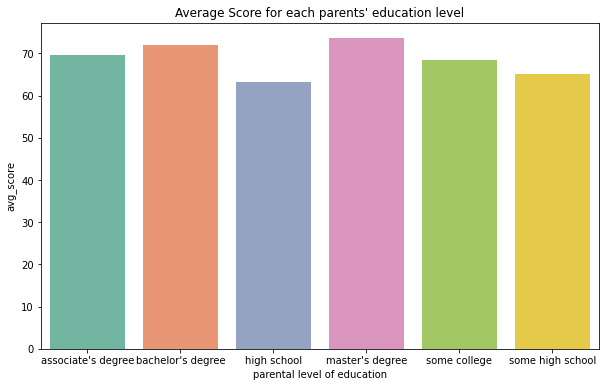

In [23]:
parent_vs = student.groupby(student["parental level of education"]).avg_score.mean().reset_index()
parent_vs = parent_vs.set_index("parental level of education")
plt.figure(figsize = (10,6))
sns.barplot(x= parent_vs.index, y= parent_vs.avg_score,  palette="Set2")
plt.title("Average Score for each parents' education level")
plt.show()

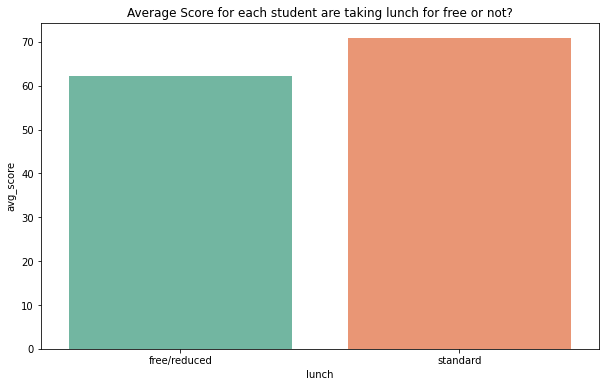

In [24]:
lunch_vs = student.groupby(student["lunch"]).avg_score.mean().reset_index()
lunch_vs = lunch_vs.set_index("lunch")
plt.figure(figsize = (10,6))
sns.barplot(x= lunch_vs.index, y= lunch_vs.avg_score,  palette="Set2")
plt.title("Average Score for each student are taking lunch for free or not?")
plt.show()

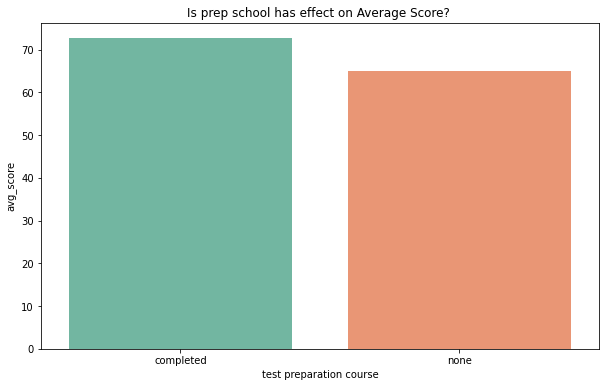

In [25]:
prepcourse_vs = student.groupby(student["test preparation course"]).avg_score.mean().reset_index()
prepcourse_vs = prepcourse_vs.set_index("test preparation course")
plt.figure(figsize = (10,6))
sns.barplot(x= prepcourse_vs.index, y= prepcourse_vs.avg_score,  palette="Set2")
plt.title("Is prep school has effect on Average Score? ")
plt.show()

We are looking average success as a target value and the other variables' effects are : 
- Completing a preparation course is have a plus for average score.
- Students who pay standard fees seems to be more successful.
- Students who have higher parents' education level is more successful.

**4- Does the test preparation course have an impact on the target variable you created?**

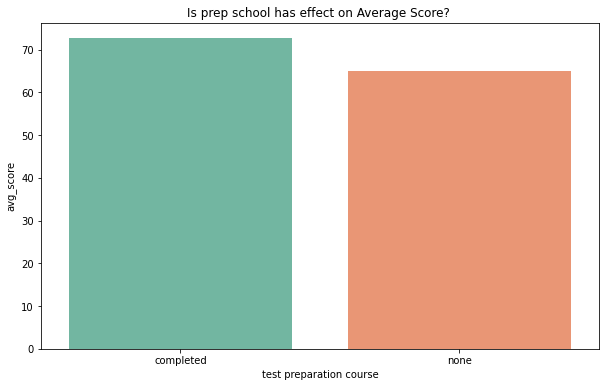

In [26]:
prepcourse_vs = student.groupby(student["test preparation course"]).avg_score.mean().reset_index()
prepcourse_vs = prepcourse_vs.set_index("test preparation course")
plt.figure(figsize = (10,6))
sns.barplot(x= prepcourse_vs.index, y= prepcourse_vs.avg_score,  palette="Set2")
plt.title("Is prep school has effect on Average Score? ")
plt.show()

- Completing a preparation course is seems like a plus for average score.

5- Create a variable that contains the weighted average of the grades in the dataset. The number of students in the fourth grade is different from that of the eighth grade. So you will need a weighted average!

In [27]:
education = pd.read_csv("data/education.csv")
education.head()

,Unnamed: 0,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,winsorizing_total_revenue,winsorizing_TOTAL_EXPENDITURE,budget_defilict,winsorized_budget_defilict,budget_defilict2,wins_budget_def2
0,0,1992_ALABAMA,ALABAMA,1992,802054.33333,2678885.00000,304177.00000,1659028.00000,715680.00000,2653798.00000,...,208.00000,252.00000,207.00000,260.00000,2678885.00000,2653798.00000,25087.00000,25087.00000,25087.00000,25087.00000
1,1,1992_ALASKA,ALASKA,1992,802054.33333,1049591.00000,106780.00000,720711.00000,222100.00000,972488.00000,...,218.41860,266.32558,215.37209,260.00000,1206819.00000,1237103.00000,77103.00000,77103.00000,-30284.00000,-30284.00000
2,2,1992_ARIZONA,ARIZONA,1992,802054.33333,3258079.00000,297888.00000,1369815.00000,1590376.00000,3401580.00000,...,215.00000,265.00000,209.00000,260.00000,3258079.00000,3401580.00000,-143501.00000,-143501.00000,-143501.00000,-143501.00000
3,3,1992_ARKANSAS,ARKANSAS,1992,802054.33333,1711959.00000,178571.00000,958785.00000,574603.00000,1743022.00000,...,210.00000,256.00000,211.00000,260.00000,1711959.00000,1743022.00000,-31063.00000,-31063.00000,-31063.00000,-31063.00000
4,4,1992_CALIFORNIA,CALIFORNIA,1992,802054.33333,26260025.00000,2072470.00000,16546514.00000,7641041.00000,27138832.00000,...,208.00000,261.00000,202.00000,260.00000,24378660.00000,25352047.00000,-878807.00000,-526142.00000,-973387.00000,-556255.00000


In [28]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1301 non-null   int64  
 1   PRIMARY_KEY                    1301 non-null   object 
 2   STATE                          1301 non-null   object 
 3   YEAR                           1301 non-null   int64  
 4   ENROLL                         1301 non-null   float64
 5   TOTAL_REVENUE                  1301 non-null   float64
 6   FEDERAL_REVENUE                1301 non-null   float64
 7   STATE_REVENUE                  1301 non-null   float64
 8   LOCAL_REVENUE                  1301 non-null   float64
 9   TOTAL_EXPENDITURE              1301 non-null   float64
 10  INSTRUCTION_EXPENDITURE        1301 non-null   float64
 11  SUPPORT_SERVICES_EXPENDITURE   1301 non-null   float64
 12  OTHER_EXPENDITURE              1301 non-null   f

In [29]:
lst = []
weighted_avg = 0
for x in range(education.shape[0]):
    number_students_4 = education.GRADES_4_G.iloc[x] / education.AVG_MATH_4_SCORE.iloc[x]
    number_students_8 = education.GRADES_8_G.iloc[x] / education.AVG_MATH_8_SCORE.iloc[x]
    avg_math_4 = education.AVG_MATH_4_SCORE.iloc[x]
    avg_math_8 = education.AVG_MATH_8_SCORE.iloc[x]
    
    weighted_avg = (number_students_4*avg_math_4)+(number_students_8*avg_math_8)/(number_students_4+number_students_8)
    
    lst.append(weighted_avg)
    
education["weighted_avg_score_4_8"] = weighted_avg

display(education["weighted_avg_score_4_8"])



0      74495.62587
1      74495.62587
2      74495.62587
3      74495.62587
4      74495.62587
           ...    
1296   74495.62587
1297   74495.62587
1298   74495.62587
1299   74495.62587
1300   74495.62587
Name: weighted_avg_score_4_8, Length: 1301, dtype: float64

***6- What is the correlation between the variable you just created and the types of expenditures? Which expenditure item has more correlation than others?***

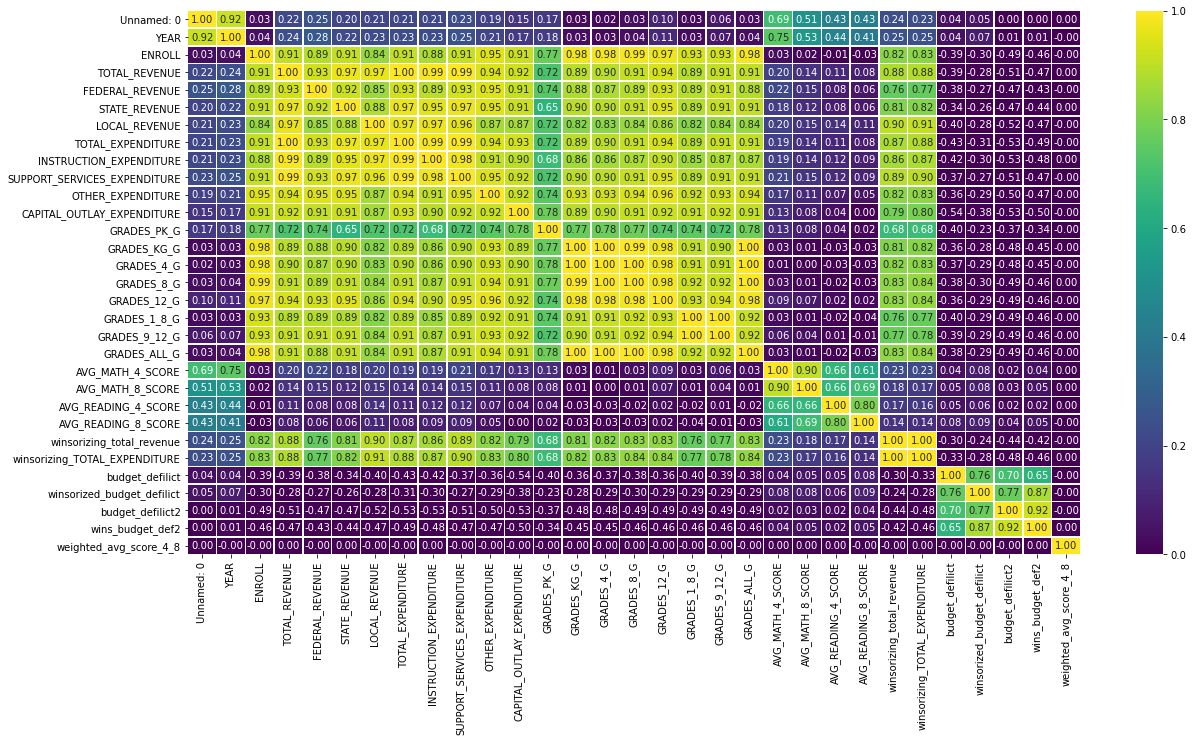

In [30]:
corr = education.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, linewidth = .5, annot = True, fmt= '.2f', annot_kws={'size':10}, cmap='viridis', vmin=0 ,vmax=1)
plt.show()

7- Now apply the Principal Components Analysis (PCA) for the four expenditure items! How much of the total variance can be explained by the first component?

In [31]:
edu_expend = pd.DataFrame([education.TOTAL_EXPENDITURE,education.INSTRUCTION_EXPENDITURE,education.SUPPORT_SERVICES_EXPENDITURE,education.OTHER_EXPENDITURE]).T
edu_expend.head()

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE
0,2653798.00000,1481703.00000,735036.00000,248234.78431
1,972488.00000,498362.00000,350902.00000,248234.78431
2,3401580.00000,1435908.00000,1007732.00000,248234.78431
3,1743022.00000,964323.00000,483488.00000,248234.78431
4,27138832.00000,14358922.00000,8520926.00000,248234.78431


In [32]:
X = edu_expend.values

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(education.select_dtypes(exclude='object'))
pca = PCA(n_components = 4)
principalComponents = pca.fit_transform(X)

In [34]:
exp_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(np.round(pca.explained_variance_ratio_ , decimals = 4)*100)
print(exp_var)
print(cumsum_var)

[0.62793069 0.14583718 0.08097565 0.03597491]
[62.79 77.37 85.47 89.07]


- **62.79%**

**8- What is the correlation between the GPA you created and the first principal component?**

In [39]:
X = pd.DataFrame(X, columns=education.select_dtypes(exclude='object').columns)

In [40]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig = plt.figure(figsize=(12,6), dpi=100)
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

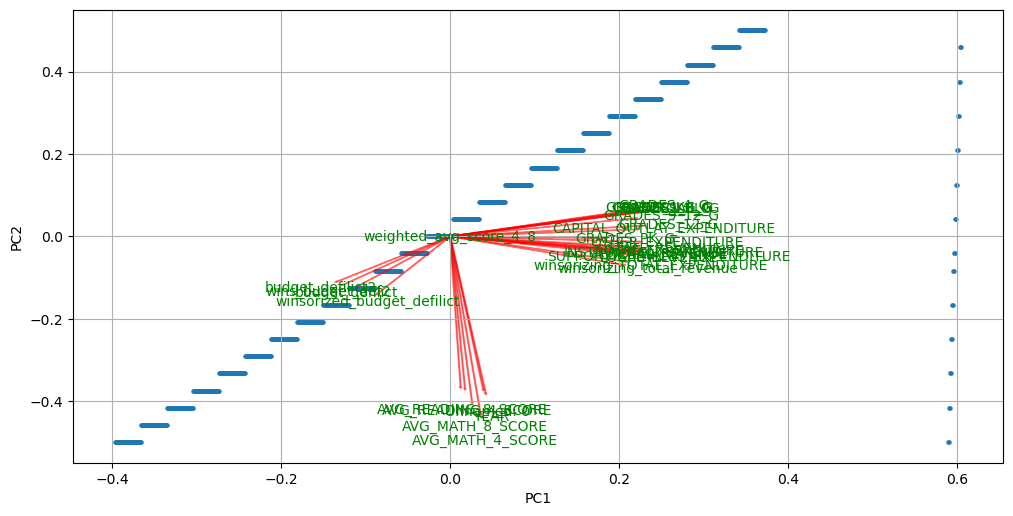

In [41]:
myplot(np.array(X)[:,0:2],np.transpose(pca.components_[0:2, :]),list(X.columns))
plt.show()

9- When you need to choose the most appropriate variables for your model, would you prefer the first basic variables instead of the expenditure items? Why?

I think I rather to choose expenditure because normal basic score variables are losing correlation with PC2 but Expenditure values are gain correlation both components.